# 基于Keras的MNIST手写数字识别
### 作者：张强   
### 微信号：MrZhangQiang2019
### 请关注公众号，免费获得更多的学习教程和资料
![](https://ai-studio-static-online.cdn.bcebos.com/c1ef6aea9943477c83541807e56c5066b0a16810dda843839ebe0edc3968748f)

### <a href="https://blog.csdn.net/u013538542" target="_blank">CSDN博客</a>
### <a href="https://github.com/21-projects-for-deep-learning" target="_blank">Github主页</a>

In [2]:
!pip install keras

In [3]:
!pip install tensorflow

In [4]:
import tensorflow
print(tensorflow.__version__)

1.13.1


In [5]:
import keras
print(keras.__version__)

2.2.4


Using TensorFlow backend.


In [6]:
import matplotlib
print(matplotlib.__version__)

2.2.3


In [7]:
import numpy
print(numpy.__version__)

1.15.4


# 获取MNIST数据集

In [8]:
import keras
from keras.datasets import  mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 48s 4us/step


In [9]:
print("X_train.shape={}, y_train.shape={}".format(X_train.shape, y_train.shape))
print("X_test.shape={}, y_test.shape={}".format(X_test.shape, y_test.shape))

X_train.shape=(60000, 28, 28), y_train.shape=(60000,)
X_test.shape=(10000, 28, 28), y_test.shape=(10000,)


# 随机显示5个MNIST图像

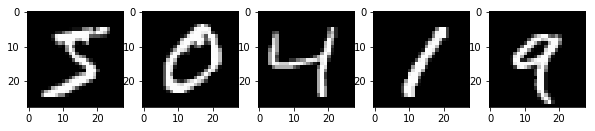

In [25]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

fig = plt.figure(figsize=(10, 10))
for i in range(5):
    ax = fig.add_subplot(1, 5, i+1)
    ax.imshow(np.reshape(X_train[i:i+1], (28, 28)), cmap='gray')

# 分割测试集，一半给验证集，另一半给测试集


In [10]:
valid_len = int(X_test.shape[0] / 2)

X_valid = X_test[:valid_len]
y_valid = y_test[:valid_len]

X_test = X_test[valid_len:]
y_test = y_test[valid_len:]

print("X_train.shape={}, y_train.shape={}".format(X_train.shape, y_train.shape))
print("X_valid.shape={}, y_valid.shape={}".format(X_valid.shape, y_valid.shape))
print("X_test.shape={}, y_test.shape={}".format(X_test.shape, y_test.shape))

X_train.shape=(60000, 28, 28), y_train.shape=(60000,)
X_valid.shape=(5000, 28, 28), y_valid.shape=(5000,)
X_test.shape=(5000, 28, 28), y_test.shape=(5000,)


# 数据集预处理

In [12]:
import numpy as np

img_size = 28 * 28
num_classes = 10

# 将训练集、验证集和测试集数据进行图像向量转换
X_train = X_train.reshape(X_train.shape[0], img_size)
X_valid = X_valid.reshape(X_valid.shape[0], img_size)
X_test = X_test.reshape(X_test.shape[0], img_size)

# 将训练集、验证集和测试集数据都转换成float32类型
X_train = X_train.astype(np.float32)
X_valid = X_valid.astype(np.float32)
X_test = X_test.astype(np.float32)

# 将训练集、验证集和测试集数据都转换成0到1之间的数值，就是归一化处理
X_train /= 255
X_valid /= 255
X_test /= 255

# 通过to_categorical()函数将训练集标签、验证集标签和测试集标签独热编码（one-hot encoding）
y_train = keras.utils.to_categorical(y_train, num_classes)
y_valid = keras.utils.to_categorical(y_valid, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

# 创建Keras的多层感知器模型

In [13]:
from keras import Sequential
from keras.layers import Dense, Dropout

# 创建Sequential模型
model = Sequential()

# 创建输入层，有512个深度，必须要传的参数是input_shape，它表示输入的图像的大小
model.add(Dense(512, activation='relu', input_shape=(img_size,)))
model.add(Dropout(0.2))

# 创建一个隐藏层，也有512个深度
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))

# 添加输出层，因为有10个类别的概率输出，所以使用softmax
model.add(Dense(num_classes, activation='softmax'))

# 模型架构预览
model.summary()

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_______________

# 编译模型

In [14]:
from keras.optimizers import RMSprop
model.compile(loss='categorical_crossentropy', optimizer=RMSprop(), metrics=['accuracy'])

# 训练模型

In [15]:
epochs = 20
batch_size = 128

history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, verbose=1, validation_data=(X_valid, y_valid))

Instructions for updating:
Use tf.cast instead.
Train on 60000 samples, validate on 5000 samples
Epoch 1/20
60000/60000 [==============================] - 9s 150us/step - loss: 0.2438 - acc: 0.9242 - val_loss: 0.1313 - val_acc: 0.9592
Epoch 2/20
60000/60000 [==============================] - 9s 146us/step - loss: 0.1012 - acc: 0.9691 - val_loss: 0.1032 - val_acc: 0.9692
Epoch 3/20
60000/60000 [==============================] - 9s 147us/step - loss: 0.0750 - acc: 0.9770 - val_loss: 0.0983 - val_acc: 0.9700
Epoch 4/20
60000/60000 [==============================] - 9s 144us/step - loss: 0.0602 - acc: 0.9818 - val_loss: 0.0927 - val_acc: 0.9716
Epoch 5/20
60000/60000 [==============================] - 9s 145us/step - loss: 0.0497 - acc: 0.9846 - val_loss: 0.1006 - val_acc: 0.9738
Epoch 6/20
60000/60000 [==============================] - 9s 150us/step - loss: 0.0436 - acc: 0.9871 - val_loss: 0.1111 - val_acc: 0.9716
Epoch 7/20
60000/60000 [==============================] - 9s 145us/step - l

In [16]:
print(history.history.keys())

dict_keys(['val_loss', 'loss', 'acc', 'val_acc'])


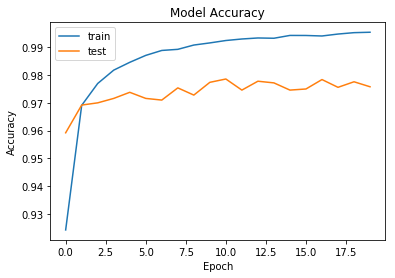

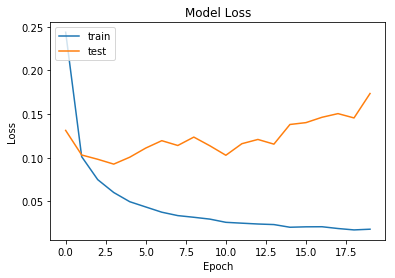

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline

# 绘制训练集和验证集的精确度
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# 绘制训练集和验证集的损失值
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# 评估模型

In [19]:
score = model.evaluate(X_test, y_test, verbose=0)
print("Test accuracy:{}, Test loss: {}.".format(score[1], score[0]))

Test accuracy:0.99, Test loss: 0.06968223751812357.


# 随便选择一张测试模型

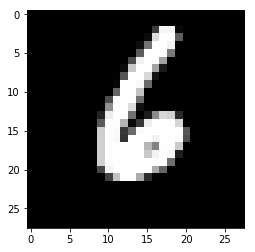

In [20]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

index_10_img = X_test[10].reshape(28, 28)
imgplot = plt.imshow(index_10_img, cmap="gray")
plt.show()

In [21]:
target_label_arr = y_test[10]
target_label = np.argmax(target_label_arr)
print("索引为10的图像是数字{}。".format(target_label))

索引为10的图像是数字6。


In [22]:
index_10_img_to_predict = X_test[10].reshape((1, 784))
predictions = model.predict(index_10_img_to_predict)
print("预测的结果是{}。".format(np.argmax(predictions[0])))

预测的结果是6。


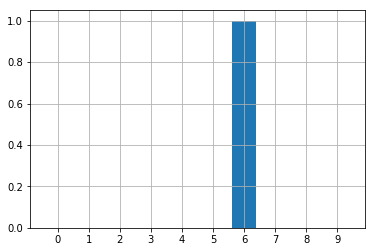

In [23]:
import matplotlib.pyplot as plt
import numpy as np

x_coordinates = np.arange(predictions.shape[1])
plt.bar(x_coordinates, predictions[0][:])
plt.xticks(x_coordinates, np.arange(10))
plt.grid()
plt.show()

# 保存模型

In [24]:
# 方式1
# 序列化模型架构到JSON文件 
model_json = model.to_json()
with open("mnist_model.json", "w") as json_file:
    json_file.write(model_json)
# 序列化模型权重到HDF5文件
model.save_weights("mnist_model.h5")
print("已以保存模型")

已以保存模型


In [25]:
from keras.models import model_from_json

# 读取已保存的模型
with open('mnist_model.json', 'r') as json_file:
    loaded_model_json = json_file.read()
my_loaded_model = model_from_json(loaded_model_json)
# 加载模型权重
my_loaded_model.load_weights("mnist_model.h5")
print("已加载模型")

已加载模型


In [26]:
index_10_img_to_predict = X_test[10].reshape((1, 784))
predictions = my_loaded_model.predict(index_10_img_to_predict)
print("加载后的模型预测的结果是{}。".format(np.argmax(predictions[0])))

加载后的模型预测的结果是6。


### 请关注公众号，免费获得更多的学习教程和资料
![](https://ai-studio-static-online.cdn.bcebos.com/c1ef6aea9943477c83541807e56c5066b0a16810dda843839ebe0edc3968748f)

### <a href="https://blog.csdn.net/u013538542" target="_blank">CSDN博客</a>
### <a href="https://github.com/21-projects-for-deep-learning" target="_blank">Github主页</a>